In [1]:
import pandas as pd
import numpy as np

# 讀取資料

In [2]:
ft=pd.read_excel("FT.xlsx")

In [3]:
ft.head()

,content
0,宏亞食品巧克力觀光工廠是一座以巧克力為主題的觀光工廠，建築設計、展場文字、陳列物、戶外景觀及...
1,台灣金屬創意館為第一座金屬造型觀光工廠，來這裡可讓大家看到並觸摸到金屬柔軟的一面，館區內充滿...
2,林口酒廠為擁有近百年歷史的台北酒廠(1921)、板橋酒廠(1937)、樹林酒廠(1906)合...
3,ㄚ發哥果園內的果樹已有數十年的歷史，園主堅持一貫的種植理念，果園的果樹皆是以發酵的牛奶灌溉長...
4,宜蘭二湖是台中以北唯一適合栽種鳳梨的的地區，早在日劇時代就有了。在早期刻苦的環境，肥料一包三...


# Jieba斷詞

In [5]:
import jieba
import jieba.posseg as pseg

In [6]:
import jieba
import jieba.posseg as pseg
def chinese_word_cut(mytext):
    words = ""
    for word,pos in pseg.cut(mytext):
        if pos == "n" :  words+=" "+word   
    return words
ft["content_cutted"] = ft.content.apply(chinese_word_cut)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\sabri\AppData\Local\Temp\jieba.cache
Loading model cost 2.600 seconds.
Prefix dict has been built succesfully.


# 存取斷詞結果

In [5]:
ft.content_cutted.head()

0     食品 觀光 工廠 主題 觀光 工廠 建築 展場 文字 外景 造型 建築 展場 建築 外觀 ...
1     金屬 創意館 金屬 造型 觀光 工廠 大家 金屬 館區 金屬 光 知性 文化 地方 金屬 ...
2     林口 酒廠 歷史 酒廠 板橋 酒廠 樹林 酒廠 酒 廠 民國 用量 酒廠 產品 文化 特色...
3     發哥 果園 果樹 歷史 園主 種植 理念 果園 果樹 牛奶 果園 水果 果肉 多汁 命礦 ...
4                    地區 日劇 時代 環境 肥料 角 肥料 大家 土 原生 土 酸 土
Name: content_cutted, dtype: object

In [10]:
ftarray= np.array(ft.content_cutted)
type(ftarray)
ftarray

array([' 食品 觀光 工廠 主題 觀光 工廠 建築 展場 文字 外景 造型 建築 展場 建築 外觀 規劃 省 碳 展場 歷史 寓教 專業 廠館 處',
       ' 金屬 創意館 金屬 造型 觀光 工廠 大家 金屬 館區 金屬 光 知性 文化 地方 金屬 創意館 志 鋼金 股份 有限公司 品牌 志 鋼金 朋友 板金 鋼鐵 公司 命名 志 鋼金 人 同心 協力 公司 品牌 思維 決議 工廠 觀 光化 板金 觀光 工廠 觀光 工廠 金屬 文化 志 鋼金 專業板 廠 化生 流程 參觀 志鋼 流程 電腦 成形 作業 部門 氬 系統 部門 產品 部門 手動 氣動 工具 產品',
       ' 林口 酒廠 歷史 酒廠 板橋 酒廠 樹林 酒廠 酒 廠 民國 用量 酒廠 產品 文化 特色 地區 設備 米糧 工廠 林口 酒廠 酒 利用 日式 清酒 清酒 全國 日式 清酒 酒廠 清酒 產物 問題 台酒 清酒 面膜 產品 定位 護膚 素材 盛況 人 葡萄酒 概念 人 口味 葡萄酒 社會 大眾 市佔率 葡萄酒 品牌 林口 酒廠 致力 酒類 方式 餅 大廠 酒 薄餅 風味 熱潮 風行 營業額 餅 界 事酒品 售 中心 清酒 民眾 觀光 客參觀 酒 林口 酒廠 工業區 景點 台塑 文物 台塑 醫療 園區 科技 園區 歌鎮 產業 地方 產業 文化 觀光 特色 主題 產業 觀光 桃 縣 光 旅 林口 酒廠 公司 資產 政策 航空 城計畫 機場 集酒類 產業 歷史 市場 地利 基礎 產業 文化 藝術 人文 資源 工廠 公園 化 清酒 意象 文化 園區 城廓 名勝 景點 設施 建構 地區 指標性 觀光 酒廠 期能 人口 來廠 觀光 營',
       ...,
       ' 文化 產業 園區 地 時期 酒 社 酒類 制度 官 全台 工場 光 酒廠 酒 工場 酒廠 政府 公賣局 公賣局 酒廠 時代 計劃 規劃 酒廠 工業區 新廠 大片 工業 歷史 建築 園區 日治 時期 歷史 建築物 全台 酒廠 政府 民意 全區 歷史 建築 文建會 文化 園區 定位 建築 藝術 中心 酒廠 酒 工 新生 文化 產業 基地',
       ' 文化 產業 園區 市中心 地 歷史 老廠 房倉庫 園區 藝文 餐飲 特色 商品 資訊 文化 藝術 商業 形塑 文創 活力 風格 聚點 旅 場域',
    

In [12]:
ftlist=ftarray.tolist()

import csv

# 開啟輸出的 CSV 檔案
with open('jiebacw.csv', 'w', newline='') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile)

  # 寫入一列資料
  writer.writerow(ftlist)

In [13]:
import csv

# 開啟輸出的 CSV 檔案
with open('jieba.csv', 'w', newline='') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile)

  # 寫入一列資料
  writer.writerow(ft["content_cutted"])

# 計算次數轉成向量

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [8]:
n_features = 15000
ft_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                max_df = 0.5,
                                min_df = 10)
tr = ft_vectorizer.fit_transform(ft.content_cutted)

In [17]:
import pandas as pd
pd.DataFrame(trarray)

NameError: name 'trarray' is not defined

In [18]:
trarray = ft_vectorizer.fit_transform(ft.content_cutted).toarray()

print(trarray)

feature_name = ft_vectorizer.get_feature_names()
pd.DataFrame(feature_name)
print(feature_name)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
['一帶', '一格', '一流', '一甲子', '一覽', '一體', '三官', '三義', '三角形', '上帝', '下午茶', '下層', '不容', '世人', '世外桃源', '世界', '世紀', '世音', '中央', '中式', '中心', '中段', '主人', '主峰', '主祀觀', '主神', '主義', '主角', '主軸', '主題', '主體', '乘船', '乘風', '乳牛', '事件', '事務', '事情', '事故', '事業', '事物', '事項', '互動', '互動式', '五色', '交叉', '交叉口', '交易', '交會', '交流', '交由', '交界', '交織', '交趾', '交通', '交錯', '亮點', '人人', '人們', '人力', '人口', '人員', '人士', '人家', '人工', '人心', '人情', '人情味', '人才', '人數', '人文', '人次', '人民', '人氣', '人流', '人潮', '人煙', '人物', '人生', '人群', '人聲', '人行', '人車', '人間', '人類', '人體', '介石', '仕紳', '仙台', '仙境', '代表', '代表性', '任務', '企業', '伐木', '住宅', '住家', '住宿', '住戶', '住民', '佛像', '佛祖', '作品', '作家', '作工', '作業', '作法', '作物', '作者', '佳景', '佳餚', '來台', '來源', '供人', '供民眾', '依序', '保護區', '信仰', '信徒', '信眾', '信義', '信義區', '倉庫', '個性', '倒影', '候鳥', '假山', '偶像', '傳奇', '傳教', '傳統', '傳說', '價值', '價格', '儀式', '優勢', '優質', '元帥', '元素', '兄弟', '先人', '先師', '先民', '先生', 

In [260]:
import csv

# 開啟輸出的 CSV 檔案
with open('trname.csv', 'w', newline='') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile)

  # 寫入一列資料
  writer.writerow(feature_name)

In [262]:
pd.DataFrame(trarray).to_csv('trarray.csv')

print(travel) #檢查是否符合

# 尋找適合的主題數(根據perplexity)

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

In [70]:
n_topics = range(5, 11, 1)
perplexityLst = [1.0]*len(n_topics)

#训练LDA并打印训练时间
lda_models = []
for idx,n_topic in enumerate(n_topics):
   # t0 = time()
    np.random.seed(16)
    lda = LatentDirichletAllocation(n_topics=n_topic,
                                    max_iter=1000,
                                    learning_method='batch',
                                    evaluate_every=200,                         
                                    verbose=0)
    lda.fit(tr)
    perplexityLst[idx] = lda.perplexity(tr)
    lda_models.append(lda)
    print("# of Topic: %d, " % n_topics[idx],)
   # print("done in %0.3fs, N_iter %d, " % ((time() - t0), lda.n_iter_),)
    print("Perplexity Score %0.3f" % perplexityLst[idx])

c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# of Topic: 5, 
Perplexity Score 848.215


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# of Topic: 6, 
Perplexity Score 857.667


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# of Topic: 7, 
Perplexity Score 834.832


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# of Topic: 8, 
Perplexity Score 824.254


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# of Topic: 9, 
Perplexity Score 808.597


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# of Topic: 10, 
Perplexity Score 814.358


Best # of Topic:  9


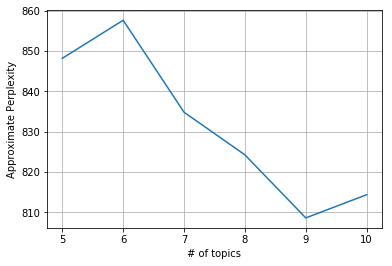

In [72]:
#打印最佳模型
best_index = perplexityLst.index(min(perplexityLst))
best_n_topic = n_topics[best_index]
best_model = lda_models[best_index]
print("Best # of Topic: ", best_n_topic)

#繪製不同主题数perplexity的不同
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(n_topics, perplexityLst)
ax.set_xlabel("# of topics")
ax.set_ylabel("Approximate Perplexity")

plt.grid(True)
#plt.savefig(os.path.join('lda_result', 'perplexityTrend'+CODE+'.png'))
plt.show()

# 尋找適合的亂數種子(根據perplexity)

In [30]:
SOME_FIXED_SEED = range(1, 11, 1)

perplexityLst = [1.0]*len(SOME_FIXED_SEED)

#训练LDA并打印训练时间
lda_models = []
for idx, SEED in enumerate(SOME_FIXED_SEED):
   # t0 = time()
    np.random.seed(SEED)
    n_topic=9
    lda = LatentDirichletAllocation(n_topics=n_topic,
                                    max_iter=1000,
                                    learning_method='online')
    lda.fit(tr)
    perplexityLst[idx] = lda.perplexity(tr)
    lda_models.append(lda)
    print("# seed: %d, " % SOME_FIXED_SEED[idx],)
   # print("done in %0.3fs, N_iter %d, " % ((time() - t0), lda.n_iter_),)
    print("Perplexity Score %0.3f" % perplexityLst[idx])

c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# seed: 1, 
Perplexity Score 874.455


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# seed: 2, 
Perplexity Score 920.354


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# seed: 3, 
Perplexity Score 883.842


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# seed: 4, 
Perplexity Score 881.072


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# seed: 5, 
Perplexity Score 886.958


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# seed: 6, 
Perplexity Score 864.859


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# seed: 7, 
Perplexity Score 895.399


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# seed: 8, 
Perplexity Score 873.235


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# seed: 9, 
Perplexity Score 892.618


c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


# seed: 10, 
Perplexity Score 868.127


Best SEED:  6


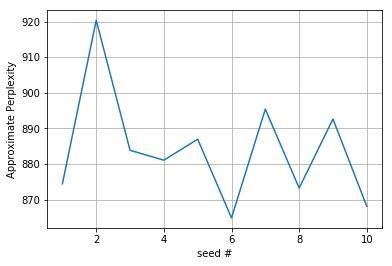

In [32]:
#打印最佳模型
best_index = perplexityLst.index(min(perplexityLst))
best_n_SEED = SOME_FIXED_SEED[best_index]
best_model = lda_models[best_index]
print("Best SEED: ", best_n_SEED)

#繪製不同主题数perplexity的不同
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(SOME_FIXED_SEED, perplexityLst)
ax.set_xlabel("seed #")
ax.set_ylabel("Approximate Perplexity")

plt.grid(True)
#plt.savefig(os.path.join('lda_result', 'perplexityTrend'+CODE+'.png'))
plt.show()

# 建LDA模型

In [10]:
n_topic = 9
lda = LatentDirichletAllocation(n_topics=n_topic,
                                    max_iter=1000,
                                    learning_method='batch',
                                    evaluate_every=200,                         
                                    verbose=0)

In [11]:
def print_top_words(model, feature_names, n_top_words):
    model.components_ /= model.components_.sum(axis=1)[:, np.newaxis]
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()#每个主题下权重较高的词语
    print(model.components_)

In [12]:
n_topic = 9
lda = LatentDirichletAllocation(n_topics=n_topic,
                                    max_iter=1000,
                                    learning_method='batch',
                                    evaluate_every=200,                         
                                    verbose=0)

SOME_FIXED_SEED=16
np.random.seed(SOME_FIXED_SEED)

trlda9=lda.fit(tr)
#trlda9.components_ /= trlda9.components_.sum(axis=1)[:, np.newaxis]  
n_top_words = 10
ft_feature_names = ft_vectorizer.get_feature_names()
print_top_words(trlda9, ft_feature_names, n_top_words)

import csv
with open('topic_word9.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(trlda9.components_.shape[1]):
        writer.writerow(trlda9.components_[:,i:(i+1)])

c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic #0:
建築 歷史 時期 客家 日治 時代 日式 風格 教堂 宿舍

Topic #1:
老街 夜市 廣場 美食 商圈 小吃 市場 中心 人潮 球場

Topic #2:
體驗 農場 遊客 咖啡 園區 觀光 工廠 生態 世界 產業

Topic #3:
廟宇 信仰 歷史 建築 觀音 媽祖 菩薩 香火 中心 地方

Topic #4:
公園 生態 園區 車道 環境 規劃 景觀 民眾 設施 面積

Topic #5:
部落 文化 原住民 車站 社區 火車 神社 隧道 遊客 鐵路

Topic #6:
文化 藝術 空間 中心 建築 文物 博物 歷史 作品 藝文

Topic #7:
步道 植物 生態 古道 森林 海拔 景觀 道路 視野 美景

Topic #8:
遊客 瀑布 淡水 景觀 碼頭 吊橋 美景 景點 地形 風景區

[[  2.27740063e-04   8.16647509e-06   8.16968655e-06 ...,   8.17039680e-06
    8.16633091e-06   8.16872031e-06]
 [  6.79941010e-04   1.69776691e-04   6.47400436e-04 ...,   1.25375775e-05
    1.25347580e-05   6.05194534e-04]
 [  7.88787189e-06   7.88515175e-06   7.89315339e-06 ...,   7.88313150e-06
    7.88313148e-06   7.88655218e-06]
 ..., 
 [  5.50304943e-06   6.29637716e-04   5.51666835e-06 ...,   5.50131468e-06
    5.50197998e-06   5.51042206e-06]
 [  6.51636138e-04   5.82097837e-06   1.05666194e-04 ...,   5.82180103e-06
    5.82027528e-06   7.22553731e-05]
 [  1.01918851e-03   8.43522314e-06   1.86182071e-04 ...,   2.

In [63]:
n_topic = 6
lda = LatentDirichletAllocation(n_topics=n_topic,
                                    max_iter=1000,
                                    learning_method='batch',
                                    evaluate_every=200,                         
                                    verbose=0)

SOME_FIXED_SEED=16
np.random.seed(SOME_FIXED_SEED)

trlda6=lda.fit(tr)
#trlda9.components_ /= trlda9.components_.sum(axis=1)[:, np.newaxis]  
n_top_words = 10
ft_feature_names = ft_vectorizer.get_feature_names()
print_top_words(trlda6, ft_feature_names, n_top_words)

import csv
with open('topic_word6.csv','w') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(trlda6.components_.shape[1]):
        writer.writerow(trlda6.components_[:,i:(i+1)])

c:\users\sabri\appdata\local\programs\python\python35\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic #0:
建築 瀑布 古道 歷史 時期 日治 日式 時代 宿舍 風格

Topic #1:
公園 步道 景觀 遊客 美景 廣場 景點 夜市 視野 車道

Topic #2:
文化 藝術 空間 中心 體驗 園區 博物 遊客 主題 建築

Topic #3:
建築 歷史 廟宇 信仰 中心 媽祖 觀音 菩薩 地方 香火

Topic #4:
生態 植物 農場 環境 園區 森林 遊客 景觀 公路 碼頭

Topic #5:
部落 文化 老街 原住民 歷史 車站 火車 時期 傳統 商圈

[[  1.70252214e-04   1.04983595e-05   1.05887169e-05 ...,   1.05317236e-05
    1.04441660e-05   1.05037811e-05]
 [  2.70217323e-04   6.39864100e-06   1.05172652e-04 ...,   1.22007600e-03
    6.32376779e-06   3.30883387e-04]
 [  5.29162553e-06   4.46641132e-04   3.32903841e-04 ...,   5.25665381e-06
    5.25822390e-06   5.39655827e-06]
 [  4.24181518e-04   1.11703109e-05   1.12033314e-05 ...,   1.11416808e-05
    7.46481525e-04   1.12181743e-05]
 [  9.25993864e-04   9.14365714e-06   9.17236567e-06 ...,   9.25728931e-06
    9.05491834e-06   9.34344521e-06]
 [  1.22008825e-03   1.15904710e-05   1.15922642e-05 ...,   1.15993586e-05
    1.15537215e-05   3.18844594e-04]]


In [46]:
trlda9.perplexity()

TypeError: perplexity() missing 1 required positional argument: 'X'

# 所有文檔的主題分布

In [68]:
doc_topic_dist9 = trlda9.transform(tr)
print(doc_topic_dist9)
list9=doc_topic_dist9.tolist()
import csv
# 開啟輸出的 CSV 檔案
with open('doc_topic9.csv', 'w') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile)

  # 寫入一列資料
  writer.writerow(list9)

[[ 0.13156123  0.00555665  0.43403793 ...,  0.40106131  0.0055559
   0.00555675]
 [ 0.00258439  0.0025843   0.97932023 ...,  0.00258622  0.00258444
   0.00258458]
 [ 0.00122179  0.0669835   0.22777838 ...,  0.13415036  0.0012213
   0.00122127]
 ..., 
 [ 0.14080846  0.00236462  0.00236512 ...,  0.15697305  0.00236455
   0.00236473]
 [ 0.00585074  0.18646388  0.00585178 ...,  0.77258649  0.00584837
   0.00584823]
 [ 0.00252632  0.00252576  0.00252711 ...,  0.83296351  0.00252557
   0.00252552]]


In [66]:
doc_topic_dist6 = trlda6.transform(tr)
print(doc_topic_dist6)
list6=doc_topic_dist6.tolist()
import csv
# 開啟輸出的 CSV 檔案
with open('doc_topic6.csv', 'w') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile)

  # 寫入一列資料
  writer.writerow(list6)

[[ 0.00846718  0.00834913  0.95808095  0.00839778  0.0083464   0.00835855]
 [ 0.00388382  0.00388634  0.98057074  0.00388433  0.0038844   0.00389038]
 [ 0.00184481  0.04384249  0.51209553  0.00183827  0.00183967  0.43853922]
 ..., 
 [ 0.0035976   0.00356878  0.42898979  0.00357467  0.00357878  0.55669038]
 [ 0.00881162  0.00883533  0.9558768   0.00880577  0.00878944  0.00888104]
 [ 0.00382017  0.00379479  0.8689281   0.00380865  0.00380897  0.11583931]]


arr=[]
for n in (range(2,20)):
  SOME_FIXED_SEED=6
  np.random.seed(SOME_FIXED_SEED)  
  model = LatentDirichletAllocation(n_topics=n, max_iter=20, random_state=1)
  model.fit(tr)
  topic_word = model.components_   # model.components_ also works
  arr.append(
    (min([max(topic_word[i]) for i in range(model.n_topics)]),
     max([max(topic_word[i]) for i in range(model.n_topics)])))
  print("top word=",n)

import matplotlib.pyplot as plt
plt.plot(arr)
plt.show()


parameters = {'n_components': [7, 8, 9, 10, 11], 'learning_decay': [.5, .7, .9]}
lda = LatentDirichletAllocation()
model = GridSearchCV(lda, parameters)
model.fit(tr)

sorted(model.cv_results_.keys())

# 視覺化

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(trlda9, ft, tr_vectorizer)